In [55]:


import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
import warnings

# Correcting the typo here
warnings.filterwarnings('ignore')

print("Setup Complete")

Setup Complete


In [58]:
path='/home/user/Pictures/ML/archive/Linear Regression - Sheet1.csv'
df=pd.read_csv(path)
df.sample(5)

,X,Y
54,55,39.888889
46,47,34.555556
157,158,108.555556
166,167,114.555556
60,61,43.888889


In [64]:
df.describe().T.style.background_gradient()

,count,mean,std,min,25%,50%,75%,max
X,300.000000,150.500000,86.746758,1.000000,75.750000,150.500000,225.250000,300.000000
Y,300.000000,102.215556,57.842711,1.888889,52.388889,102.222222,152.055556,201.888889


In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X       300 non-null    int64  
 1   Y       300 non-null    float64
dtypes: float64(1), int64(1)
memory usage: 4.8 KB


In [68]:
df.nunique()

X    300
Y    299
dtype: int64

In [70]:
print('Missing Entries:',df.isna().sum().sum())

Missing Entries: 0


<Axes: xlabel='Y'>

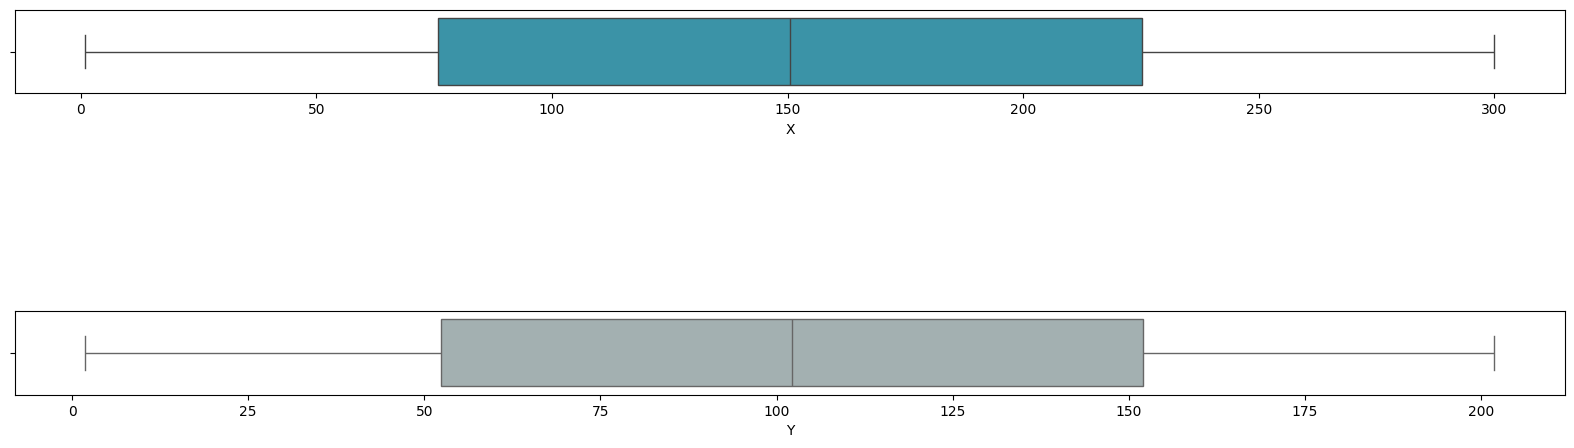

In [74]:
plt.figure(figsize=(20,5))
plt.subplot(4,1,1)
sns.boxplot(x=df.X, color='#299FB9')

plt.subplot(4,1,4)
sns.boxplot(x=df.Y, color='#A1B2B3')

In [76]:
#Data prepration 
X=df.iloc[:,:-1].values
y=df.iloc[:,-1].values

In [78]:
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.05, random_state=0)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(285, 1) (15, 1) (285,) (15,)


In [79]:
y_train=np.array(y_train).reshape(-1,1)
y_test=np.array(y_test).reshape(-1,1)
y_test=pd.DataFrame(y_test)
print((X_train.shape,X_test.shape,y_train.shape,y_test.shape))

((285, 1), (15, 1), (285, 1), (15, 1))


In [80]:
(m,n)=X_train.shape

In [82]:
theta=np.zeros((n,1))
theta

array([[0.]])

In [86]:
def cost(X_train, y_train, theta):
    G=0
    h=X_train@theta
    sqrErrors=(h-y_train)**2
    G=1/(2*m)*sqrErrors.sum()
    return G
G=cost(X_train, y_train, theta)
G

np.float64(6847.696882060116)

In [89]:
num_iters=20
alpha=0.00001

def DescentGradient(X_train, y_train, theta, num_iters, alpha):
    cost_history=[]
    past_thetas=[theta]
    for i in range(num_iters):
        h=X_train@theta
        delta=(X_train.transpose()@(h-y_train))/m
        theta=theta-alpha*delta
        cost_i=cost(X_train,y_train, theta)
        cost_history.append(cost_i)
        past_thetas.append(theta)

    return past_thetas, cost_history

past_thetas, cost_history=DescentGradient(X_train, y_train, theta, num_iters, alpha)
theta=past_thetas[-1]

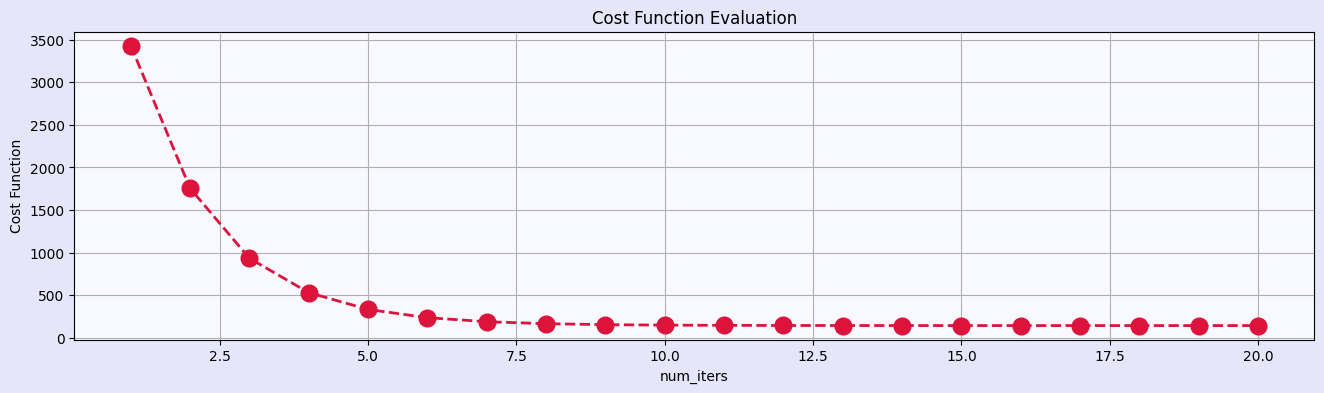

In [91]:

x=np.arange(1,len(cost_history)+1)
plt.figure(figsize=(16,4),facecolor='lavender')
plt.axes().set_facecolor('ghostwhite')
plt.plot(x,cost_history, 'go--',linewidth=2, markersize=12,color="crimson")
plt.grid()
plt.xlabel("num_iters")
plt.ylabel("Cost Function")
plt.title('Cost Function Evaluation')
plt.show()

(241,)
